In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

import acquire as acq
import prepare as prep
import modeling as mod 

from sklearn.ensemble import RandomForestClassifier

In [2]:
t_train, t_validate, t_test = prep.get_prep_split_titanic()

In [3]:
t_train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [4]:
baseline_accuracy = 329 / 534
t_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [5]:
target = "survived"

In [6]:
x_train = t_train.drop(columns=["survived", "sex", "passenger_id", "embarked"])

x_train.head()

y_train = t_train[target]

y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [7]:
# validate 
x_validate = t_validate.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_validate = t_validate[target]

# test
x_test = t_test.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_test = t_test[target]

In [8]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [9]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.9456928838951311

In [10]:
rf.score(x_validate, y_validate)

0.7584269662921348

In [11]:
rf.feature_importances_

array([0.09939135, 0.06823523, 0.0490034 , 0.40936407, 0.02277873,
       0.30233456, 0.01561651, 0.03327614])

In [12]:
x_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

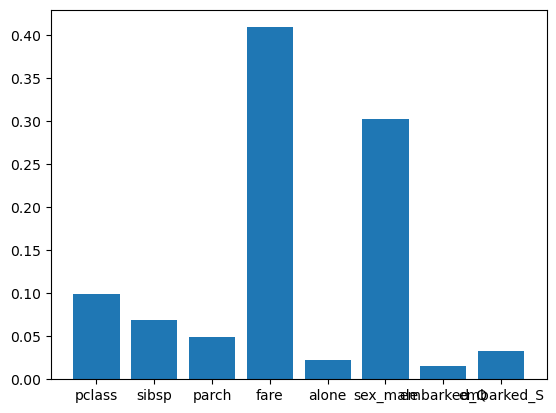

In [13]:
plt.bar(x_train.columns, rf.feature_importances_);

In [14]:
trees = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)
trees.fit(x_train, y_train)
trees.score(x_train, y_train)
trees.predict(x_train)
y_pred = trees.predict(x_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [15]:
trees.score(x_train, y_train)

0.9438202247191011

In [16]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[324,   5],
       [ 25, 180]])

In [17]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [18]:
#make pretty with df
pd.DataFrame(conf,
            index=[f"{label} _actual" for label in labels],
            columns=[f"{label} _predict" for label in labels])

,0 _predict,1 _predict
0 _actual,324,5
1 _actual,25,180


In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



In [20]:
trees.score(x_validate, y_validate)

0.7584269662921348

The best max depth is with an accuracy of 4

In [13]:
df = prep.get_prep_telco()

In [14]:
df

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tech_support_No internet service,tech_support_Yes,churn_Yes
0,0,9,65.60,593.30,0,1,1,1,0,0,0,0,1,0,1,0
1,0,9,59.90,542.40,1,0,0,0,0,0,0,0,1,0,0,0
2,0,4,73.90,280.85,1,0,0,1,1,0,0,1,0,0,0,1
3,1,13,98.00,1237.85,1,1,0,1,1,0,0,1,0,0,0,1
4,1,3,83.90,267.40,0,1,0,1,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,0,0,0,0,0,0,0,1,0,1,0
7039,0,22,85.10,1873.70,1,1,0,1,1,0,0,1,0,0,0,1
7040,0,2,50.30,92.75,1,0,0,1,0,0,0,0,1,0,0,0
7041,0,67,67.85,4627.65,1,1,1,0,0,0,0,0,1,0,1,0


In [6]:
tree = RandomForestClassifier()
tree.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
x_train, y_train, x_validate, y_validate, x_test, y_test = mod.create_x_y(df,"churn_Yes")
x_test.shape

(1409, 16)

In [18]:
x_train

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tech_support_No internet service,tech_support_Yes,churn_Yes
5911,0,26,39.95,1023.75,1,0,1,1,0,0,0,0,0,0,0,0
2479,0,47,26.90,1250.85,0,1,0,0,0,1,0,1,0,1,0,0
5889,0,1,50.45,50.45,0,0,0,1,0,0,0,0,1,0,0,1
6087,0,69,60.05,4176.70,1,0,0,1,0,0,0,0,0,0,1,0
785,0,51,87.55,4475.90,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,0,2,79.70,165.00,0,1,0,0,1,0,0,0,0,0,0,1
356,1,52,50.50,2566.30,0,0,0,1,0,0,0,1,0,0,1,0
1756,0,4,70.20,237.95,1,0,0,1,1,0,0,1,0,0,0,1
2127,0,35,55.25,1924.10,1,0,0,0,0,0,0,0,1,0,0,0


In [17]:
mod.rf_max_depth_function(x_train, y_train, x_validate, y_validate)

1
0.8423668639053254
max depth- 1 accuracy- 0.84 validation accuracy 0.85
2
1.0
max depth- 2 accuracy- 1.0 validation accuracy 1.0
3
0.9997633136094675
max depth- 3 accuracy- 1.0 validation accuracy 1.0
4
1.0
max depth- 4 accuracy- 1.0 validation accuracy 1.0
5
1.0
max depth- 5 accuracy- 1.0 validation accuracy 1.0
6
1.0
max depth- 6 accuracy- 1.0 validation accuracy 1.0
7
1.0
max depth- 7 accuracy- 1.0 validation accuracy 1.0
8
1.0
max depth- 8 accuracy- 1.0 validation accuracy 1.0
9
1.0
max depth- 9 accuracy- 1.0 validation accuracy 1.0
10
1.0
max depth- 10 accuracy- 1.0 validation accuracy 1.0


In [25]:
# max_depth = 2

In [26]:
mod.rf_min_leaf_function(x_train, y_train, x_validate, y_validate)

min samples leaf- 1 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 2 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 3 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 4 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 5 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 6 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 7 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 8 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 9 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 10 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 11 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 12 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 13 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 14 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 15 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 16 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 17 accuracy- 1.0 validation accuracy 1.0
min sa

In [28]:
y_pred, conf, pretty  = mod.rf_tree_predict(tree, x_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      0.99      1121

    accuracy                           1.00      4225
   macro avg       1.00      0.99      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [29]:
pretty

,0 _predict,1 _predict
0 _actual,3104,0
1 _actual,15,1106


In [4]:
df = prep.get_prep_titanic()
df

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


In [5]:
drop_col= ["sex", "passenger_id", "embarked"]

x_train, y_train, x_validate, y_validate, x_test, y_test = mod.create_x_y(df, "survived", drop_col)

NameError: name 'mod' is not defined

In [2]:
x_train

NameError: name 'x_train' is not defined

In [48]:
mod.rf_max_depth_function(x_train, y_train, x_validate, y_validate)

1
0.9681647940074907
max depth- 1 accuracy- 0.97 validation accuracy 0.97
2
1.0
max depth- 2 accuracy- 1.0 validation accuracy 1.0
3
1.0
max depth- 3 accuracy- 1.0 validation accuracy 1.0
4
1.0
max depth- 4 accuracy- 1.0 validation accuracy 1.0
5
1.0
max depth- 5 accuracy- 1.0 validation accuracy 1.0
6
1.0
max depth- 6 accuracy- 1.0 validation accuracy 1.0
7
1.0
max depth- 7 accuracy- 1.0 validation accuracy 1.0
8
1.0
max depth- 8 accuracy- 1.0 validation accuracy 1.0
9
1.0
max depth- 9 accuracy- 1.0 validation accuracy 1.0
10
1.0
max depth- 10 accuracy- 1.0 validation accuracy 1.0
11
1.0
max depth- 11 accuracy- 1.0 validation accuracy 1.0
12
1.0
max depth- 12 accuracy- 1.0 validation accuracy 1.0
13
1.0
max depth- 13 accuracy- 1.0 validation accuracy 1.0
14
1.0
max depth- 14 accuracy- 1.0 validation accuracy 1.0
15
1.0
max depth- 15 accuracy- 1.0 validation accuracy 1.0
16
1.0
max depth- 16 accuracy- 1.0 validation accuracy 1.0
17
1.0
max depth- 17 accuracy- 1.0 validation accuracy 1.

In [49]:
mod.rf_min_leaf_function(x_train, y_train, x_validate, y_validate)

min samples leaf- 1 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 2 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 3 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 4 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 5 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 6 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 7 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 8 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 9 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 10 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 11 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 12 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 13 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 14 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 15 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 16 accuracy- 1.0 validation accuracy 1.0
min samples leaf- 17 accuracy- 1.0 validation accuracy 1.0
min sa

In [50]:
tree = RandomForestClassifier(max_depth=2)
tree.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)